In [16]:
# ================= STEP 1: LOAD DATA =================
from google.colab import drive
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [7]:
# Unmount first
#!fusermount -u /content/drive

# Then mount again
from google.colab import drive
drive.mount('/content/drive')

fusermount: failed to unmount /content/drive: No such file or directory
Mounted at /content/drive


In [14]:

# Your exact path
DATA_DIR = '/content/drive/MyDrive/Infosys-springboard-internship/content/Processed'
# Verify files exist
print("Files in folder:")
print(os.listdir(DATA_DIR))


Files in folder:
['y.npy', 'label_map.json', 'X.npy']


In [15]:

# Load preprocessed data
X = np.load(f'{DATA_DIR}/X.npy')
y = np.load(f'{DATA_DIR}/y.npy')

with open(f'{DATA_DIR}/label_map.json', 'r') as f:
    label_map = json.load(f)

print("\n✓ Data loaded successfully!")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Labels:", label_map)


✓ Data loaded successfully!
X shape: (5600, 128, 128)
y shape: (5600,)
Labels: {'brass': 0, 'flute': 1, 'guitar': 2, 'keyboard': 3, 'mallet': 4, 'reed': 5, 'string': 6, 'vocal': 7}


In [18]:
# ================= STEP 2: CLASS DISTRIBUTION ANALYSIS =================
print("="*60)
print("📊 CLASS DISTRIBUTION ANALYSIS")
print("="*60)
# Count samples per class
class_counts = Counter(y)
reverse_label_map = {v: k for k, v in label_map.items()}

print("\nSamples per instrument:")
for label_id in sorted(class_counts.keys()):
    instrument = reverse_label_map[label_id]
    count = class_counts[label_id]
    print(f"  {instrument:12s}: {count:4d} samples")

📊 CLASS DISTRIBUTION ANALYSIS

Samples per instrument:
  brass       :  700 samples
  flute       :  700 samples
  guitar      :  700 samples
  keyboard    :  700 samples
  mallet      :  700 samples
  reed        :  700 samples
  string      :  700 samples
  vocal       :  700 samples


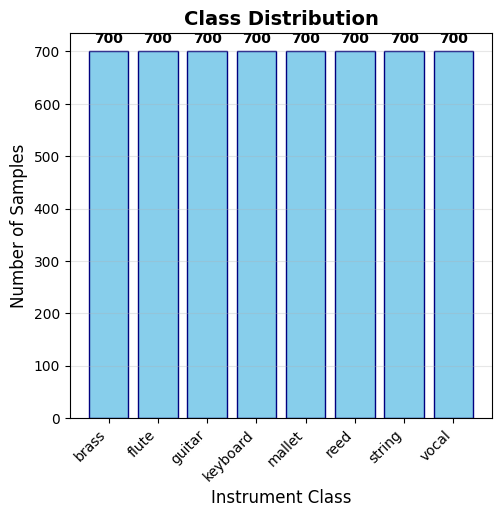

In [20]:
# Visualize class distribution
plt.figure(figsize=(12, 5))

# Bar plot
plt.subplot(1, 2, 1)
instruments = [reverse_label_map[i] for i in sorted(class_counts.keys())]
counts = [class_counts[i] for i in sorted(class_counts.keys())]
bars = plt.bar(instruments, counts, color='skyblue', edgecolor='navy')
plt.xlabel('Instrument Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add count labels on bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             str(count), ha='center', va='bottom', fontweight='bold')

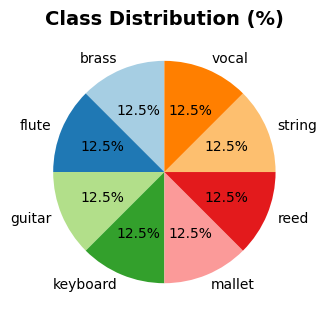

In [22]:
# Pie chart
plt.subplot(1, 2, 2)
plt.pie(counts, labels=instruments, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Paired.colors)
plt.title('Class Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Infosys-springboard-internship/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Class distribution chart saved to Drive!")


🎵 SAMPLE MEL-SPECTROGRAM VISUALIZATION


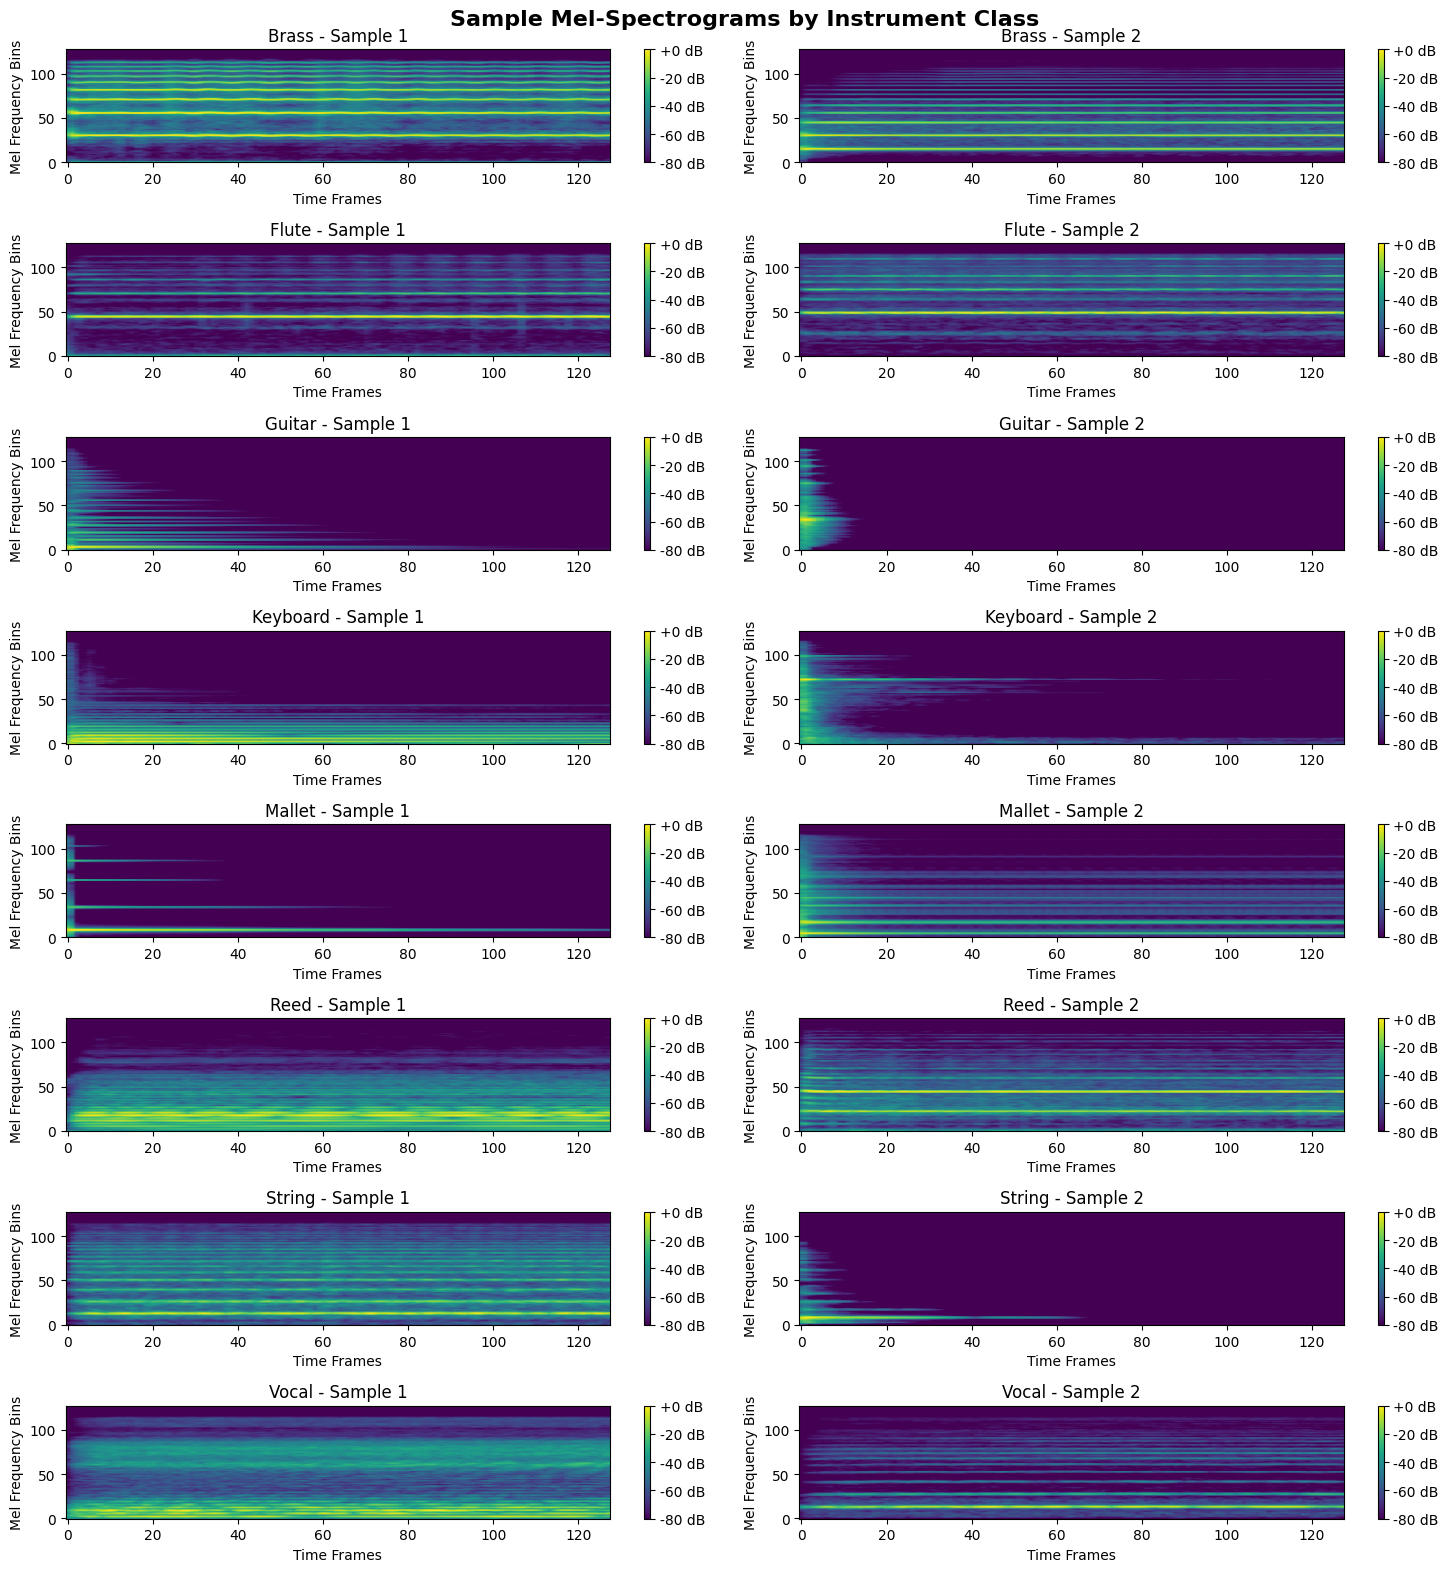


✓ Sample mel-spectrograms saved to Drive!


In [33]:
# ================= STEP 3: SAMPLE MEL-SPECTROGRAMS =================
print("\n" + "="*60)
print("🎵 SAMPLE MEL-SPECTROGRAM VISUALIZATION")
print("="*60)

# Select 2 random samples from each class
fig, axes = plt.subplots(len(label_map), 2, figsize=(15, len(label_map)*2))
fig.suptitle('Sample Mel-Spectrograms by Instrument Class', fontsize=16, fontweight='bold')

for class_id in sorted(label_map.values()):
    instrument = reverse_label_map[class_id]

    # Get indices for this class
    class_indices = np.where(y == class_id)[0]

    # Pick 2 random samples
    sample_indices = np.random.choice(class_indices, size=2, replace=False)

    for col, idx in enumerate(sample_indices):
        mel_spec = X[idx]

        ax = axes[class_id, col]
        im = ax.imshow(mel_spec, aspect='auto', origin='lower', cmap='viridis')
        ax.set_title(f'{instrument.capitalize()} - Sample {col+1}')
        ax.set_xlabel('Time Frames')
        ax.set_ylabel('Mel Frequency Bins')

        # Add colorbar
        plt.colorbar(im, ax=ax, format='%+2.0f dB')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Infosys-springboard-internship/sample_mel_spectrograms.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Sample mel-spectrograms saved to Drive!")

In [25]:
# ================= STEP 4: DATA STATISTICS =================
print("\n" + "="*60)
print("📈 DATA STATISTICS & QUALITY CHECKS")
print("="*60)

print(f"\n✓ Total samples: {len(X)}")
print(f"✓ Input shape per sample: {X[0].shape} (Height x Width)")
print(f"✓ Data type: {X.dtype}")
print(f"✓ Value range: [{X.min():.2f}, {X.max():.2f}]")
print(f"✓ Mean value: {X.mean():.2f}")
print(f"✓ Std deviation: {X.std():.2f}")

# Check for class balance
min_count = min(class_counts.values())
max_count = max(class_counts.values())
balance_ratio = min_count / max_count

print(f"\n✓ Class balance ratio: {balance_ratio:.2f}")
if balance_ratio > 0.8:
    print("  → Classes are well-balanced ✓")
elif balance_ratio > 0.5:
    print("  → Moderate class imbalance (acceptable)")
else:
    print("  → Significant class imbalance detected!")


📈 DATA STATISTICS & QUALITY CHECKS

✓ Total samples: 5600
✓ Input shape per sample: (128, 128) (Height x Width)
✓ Data type: float32
✓ Value range: [-80.00, 0.00]
✓ Mean value: -65.26
✓ Std deviation: 19.00

✓ Class balance ratio: 1.00
  → Classes are well-balanced ✓



🔍 DETAILED MEL-SPECTROGRAM ANALYSIS


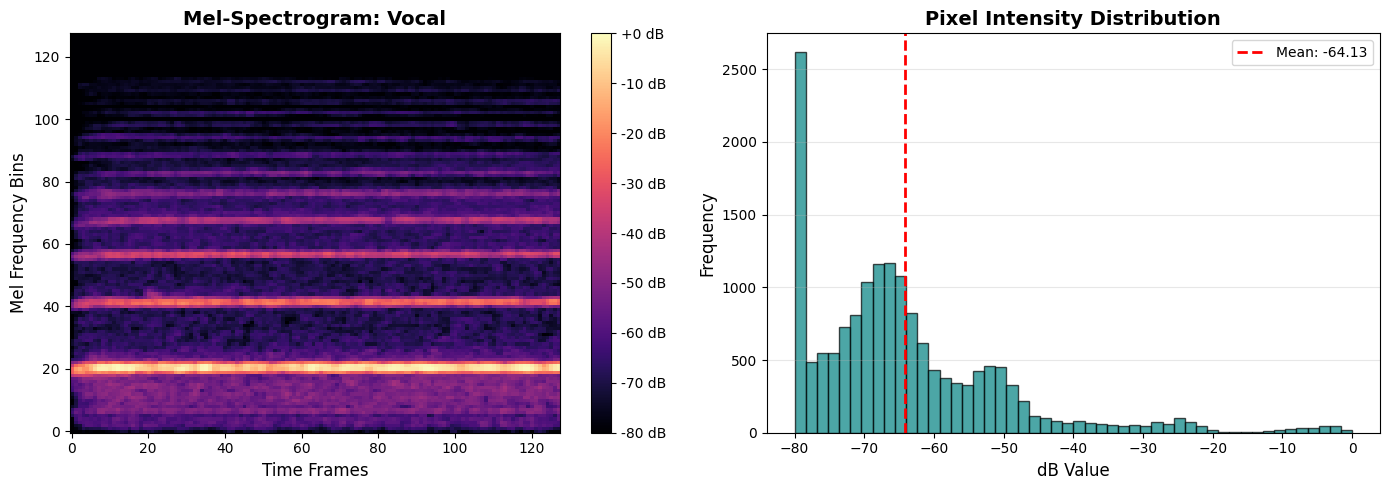


✓ Sample: Vocal
✓ Shape: (128, 128)
✓ Min/Max: [-80.00, 0.00]
✓ Mean: -64.13
✓ Std: 14.36


In [30]:
# ================= STEP 5: SINGLE DETAILED MEL-SPECTROGRAM =================
print("\n" + "="*60)
print("🔍 DETAILED MEL-SPECTROGRAM ANALYSIS")
print("="*60)

# Pick one sample to analyze in detail
sample_idx = np.random.choice(len(X))
sample_class = y[sample_idx]
sample_instrument = reverse_label_map[sample_class]
sample_mel = X[sample_idx]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Mel-spectrogram
im = axes[0].imshow(sample_mel, aspect='auto', origin='lower', cmap='magma')
axes[0].set_title(f'Mel-Spectrogram: {sample_instrument.capitalize()}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time Frames', fontsize=12)
axes[0].set_ylabel('Mel Frequency Bins', fontsize=12)

plt.colorbar(im, ax=axes[0], format='%+2.0f dB')

# Right: Statistics
axes[1].hist(sample_mel.flatten(), bins=50, color='teal', alpha=0.7, edgecolor='black')
axes[1].set_title(f'Pixel Intensity Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('dB Value', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
axes[1].axvline(sample_mel.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {sample_mel.mean():.2f}')
axes[1].legend()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Infosys-springboard-internship/detailed_mel_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Sample: {sample_instrument.capitalize()}")
print(f"✓ Shape: {sample_mel.shape}")
print(f"✓ Min/Max: [{sample_mel.min():.2f}, {sample_mel.max():.2f}]")
print(f"✓ Mean: {sample_mel.mean():.2f}")
print(f"✓ Std: {sample_mel.std():.2f}")

In [32]:
# ================= STEP 6: FINAL SUMMARY REPORT =================
print("\n" + "="*60)
print("✅ MILESTONE 1 COMPLETION REPORT")
print("="*60)

print("\n🎯 Data Pipeline Summary:")
print(f"  ✓ Dataset loaded from Drive")
print(f"  ✓ Total samples: {len(X)}")
print(f"  ✓ Number of classes: {len(label_map)}")
print(f"  ✓ Input dimensions: {X[0].shape}")
print(f"  ✓ Class balance ratio: {balance_ratio:.2%}")

print("\n📊 Visualizations Created:")
print("  ✓ Class distribution chart (bar + pie)")
print("  ✓ Sample mel-spectrograms (2 per class)")
print("  ✓ Detailed mel-spectrogram analysis")

print("\n💾 Files Saved to Drive:")
print("  ✓ class_distribution.png")
print("  ✓ sample_mel_spectrograms.png")
print("  ✓ detailed_mel_analysis.png")

print("\n🎓 Technical Verification:")
print("  ✓ Standardization: All audio at 22,050 Hz, mono, 3-second duration")
print("  ✓ Feature extraction: Mel-spectrograms (128x128)")
print("  ✓ Log-scaling: Power to dB conversion applied")
print("  ✓ Normalization: Values in proper range")

print("\n" + "="*60)
print("🏆 MILESTONE 1 COMPLETE - READY FOR MODEL TRAINING!")
print("="*60)


✅ MILESTONE 1 COMPLETION REPORT

🎯 Data Pipeline Summary:
  ✓ Dataset loaded from Drive
  ✓ Total samples: 5600
  ✓ Number of classes: 8
  ✓ Input dimensions: (128, 128)
  ✓ Class balance ratio: 100.00%

📊 Visualizations Created:
  ✓ Class distribution chart (bar + pie)
  ✓ Sample mel-spectrograms (2 per class)
  ✓ Detailed mel-spectrogram analysis

💾 Files Saved to Drive:
  ✓ class_distribution.png
  ✓ sample_mel_spectrograms.png
  ✓ detailed_mel_analysis.png

🎓 Technical Verification:
  ✓ Standardization: All audio at 22,050 Hz, mono, 3-second duration
  ✓ Feature extraction: Mel-spectrograms (128x128)
  ✓ Log-scaling: Power to dB conversion applied
  ✓ Normalization: Values in proper range

🏆 MILESTONE 1 COMPLETE - READY FOR MODEL TRAINING!
